1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
beagle (58.59%)


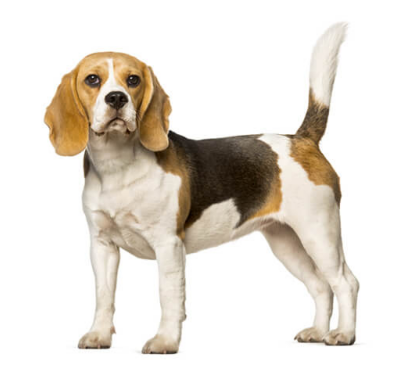

In [1]:
import requests
from PIL import Image
from io import BytesIO
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np
import matplotlib.pyplot as plt

# URL of the image
image_url = 'https://www.purina.in/sites/default/files/2021-02/BREED%20Hero_0009_beagle_0.jpg'  # Replace with the actual image URL

# Load image from URL
response = requests.get(image_url)
image = Image.open(BytesIO(response.content)).resize((224, 224))

# Convert the image pixels to a numpy array
image = img_to_array(image)
# Reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# Prepare the image for the VGG model
image = preprocess_input(image)

# Load the model
model = VGG16()
# Predict the probability across all output classes
yhat = model.predict(image)
# Convert the probabilities to class labels
label = decode_predictions(yhat)
# Retrieve the most likely result, e.g., highest probability
label = label[0][0]
# Print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

# Display the image
img = np.array(Image.open(BytesIO(response.content)))
plt.imshow(img)
plt.axis('off')  # Turn off axis
plt.show()
